In [6]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(stringr) 
library(gridExtra)
library(dplyr)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=22, repr.plot.height=12)

# Read Winkels et al. (2020)
macrophage_data <- readRDS("../../../data/R Objects/Annotated Subtype Objects/Horstmann_macrophages_annotated.rds")

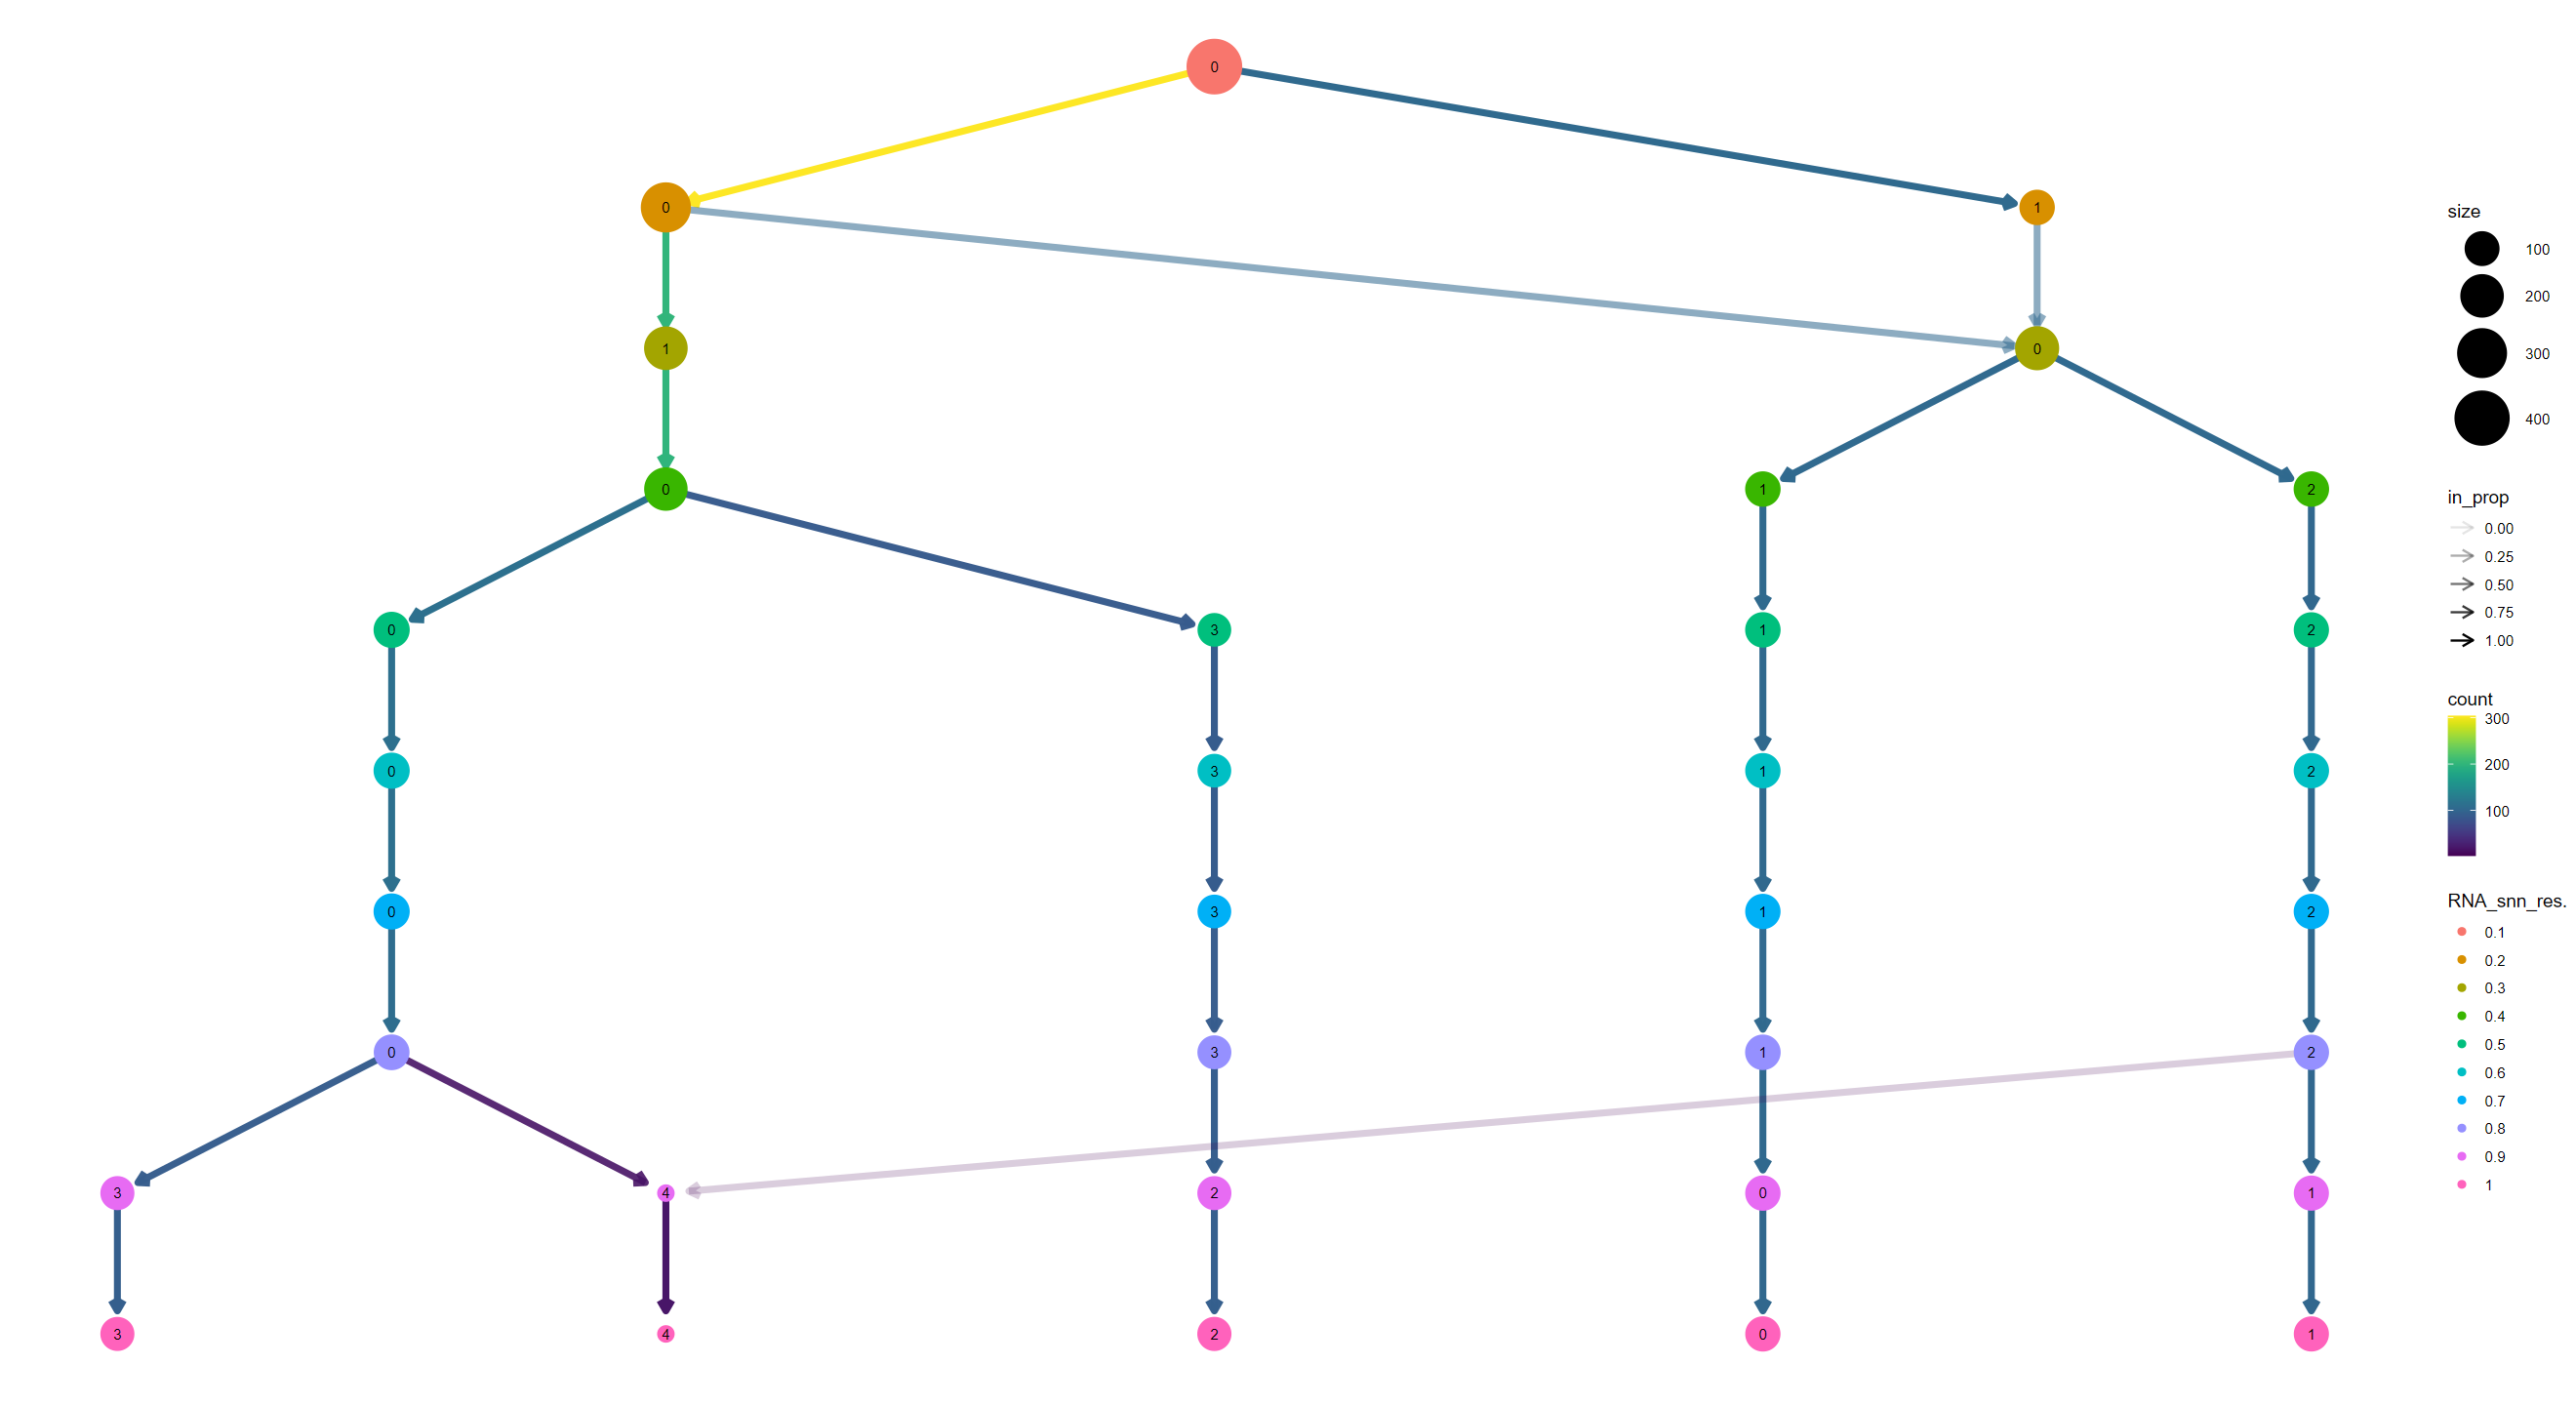

In [ ]:
# This cell is meant to analyze the different resolutions and see which one is the best
clustree(macrophage_data, prefix= "RNA_snn_res.", layout = "sugiyama")

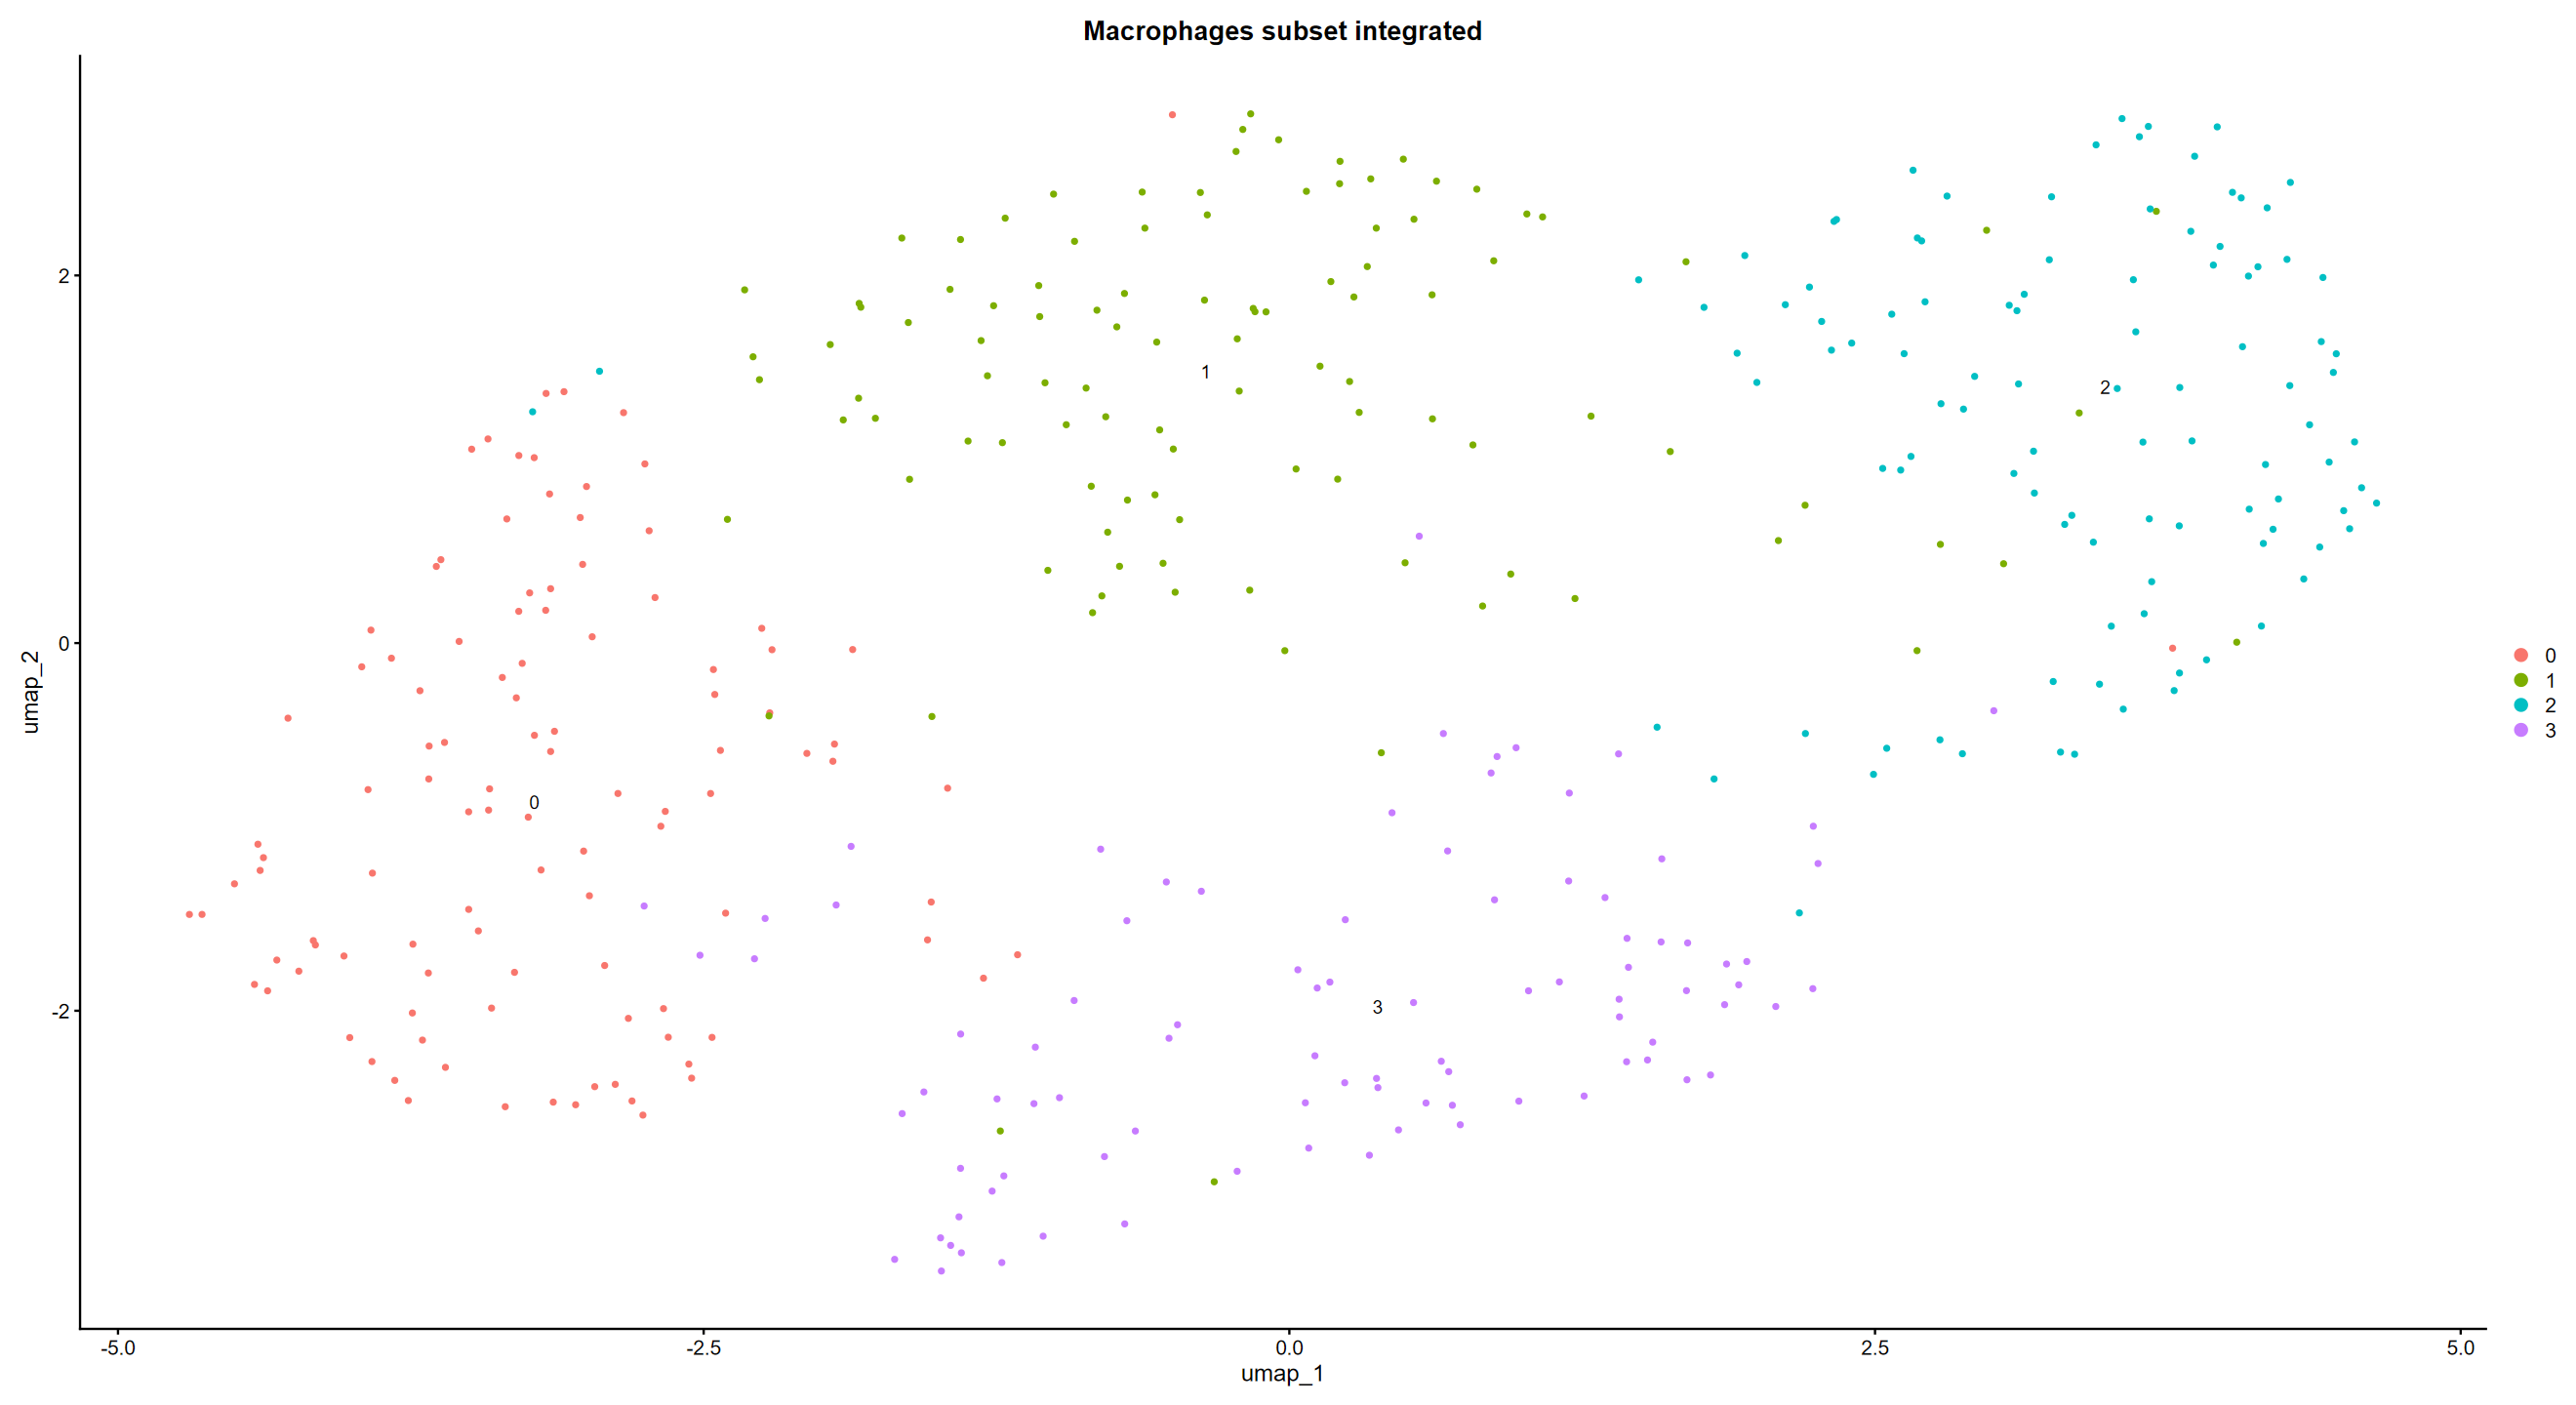

In [8]:
# Assign the slot "Seurat Cluster" to the desired resolution
macrophage_data$seurat_clusters <- macrophage_data$`RNA_snn_res.0.8`
macrophage_data <- SetIdent(macrophage_data, value = "seurat_clusters")

#Idents(macrophage_data) <- "seurat_clusters"

# Plot
DimPlot(macrophage_data, reduction = "umap", group.by = "RNA_snn_res.0.8", label = TRUE) + 
    ggtitle("Macrophages subset integrated")

In [9]:
# Some marker genes according to Winther & Willemsen
features_inflammatory <- c("S100A8", "S100A9", "IL1B", "CASP1", "CASP4", "NLRP3", "TNF", "EGR1", "ZPF36", "IER3", "CEPBP", "CXCL2", "CCL2-5")
features_resident <- c("LYVE1", "CX3CR1", "FOLR2", "C1QA", "C1QB", "C1QC", "CD74", "HLA-DRA", "HLA-DRB1", "PF4", "SEPP1", "VSIG4", "F13A1")
features_trem2 <- c("TREM2", "TREM1", "CD9", "FABP5", "APOE", "APOC1", "SPP1", "LGALS3", "CTSB")
features_trem1 <- c("TREM1", "TNF", "CEBPB", "Il1B", "CCL2", "CCL17", "CCL20", "CXCL1", "CXCL2", "CXCL3", "CXCL8" )
features_ifnic <- c("ISG15", "IRF7", "IFIT3", "IFIT1")
features_proliferating <- c("STMN1", "TOP2A", "MKI67", "TUBA1B", "TUBB5")
features_monocytes <- c("CD14", "CD16", "HLA-DR", "CCR2", "CX3CR1", "CD11b", "CD64", "LYZ")

# Add a module score to the Seurat object
macrophage_data <- AddModuleScore(macrophage_data, features = list(features_inflammatory), name = "FeatureGeneScore_inflammatory")
macrophage_data <- AddModuleScore(macrophage_data, features = list(features_resident), name = "FeatureGeneScore_resident_like")
macrophage_data <- AddModuleScore(macrophage_data, features = list(features_trem2), name = "FeatureGeneScore_trem2")
macrophage_data <- AddModuleScore(macrophage_data, features = list(features_ifnic), name = "FeatureGeneScore_ifnic")
macrophage_data <- AddModuleScore(macrophage_data, features = list(features_proliferating), name = "FeatureGeneScore_proliferating")

# Vln plots
inflammatory_vln <- VlnPlot(macrophage_data, features = "FeatureGeneScore_inflammatory1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for inflammatory macrophage markers")
residents_vln <- VlnPlot(macrophage_data, features = "FeatureGeneScore_resident_like1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for resident-like macrophage markers")
trem2_vln <- VlnPlot(macrophage_data, features = "FeatureGeneScore_trem21", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
ifn_vln <- VlnPlot(macrophage_data, features = "FeatureGeneScore_ifnic1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
proliferating_vln <- VlnPlot(macrophage_data, features = "FeatureGeneScore_proliferating1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")

# Visualizing DotPlots to view marker genes
inflammatory_dot <- DotPlot(macrophage_data, features = features_inflammatory) + 
  ggtitle("Inflammatory Macrophages") + RotatedAxis()

resident_dot <- DotPlot(macrophage_data, features = features_resident) + 
  ggtitle("Resident-Like Macrophages")

TREM2_dot <- DotPlot(macrophage_data, features = features_trem2) + 
  ggtitle("TREM2 'Foamy' Macrophages")

IFNIC_dot <- DotPlot(macrophage_data, features = features_ifnic) + 
  ggtitle("IFNIC Macrophages")

proliferating_dot <- DotPlot(macrophage_data, features = features_proliferating) + 
  ggtitle("Proliferating Macrophages")


Warning message:
"The following features are not present in the object: ZPF36, CEPBP, CCL2-5, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: SEPP1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: TUBB5, not searching for symbol synonyms"
Warning message:
"The following requested variables were not found: ZPF36, CEPBP, CCL2-5"
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Warning message:
"The following requested variables were not found: SEPP1"
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Warning message:
"The following requested variables were not found: TUBB5"
Warning message:
"Scaling data with a l

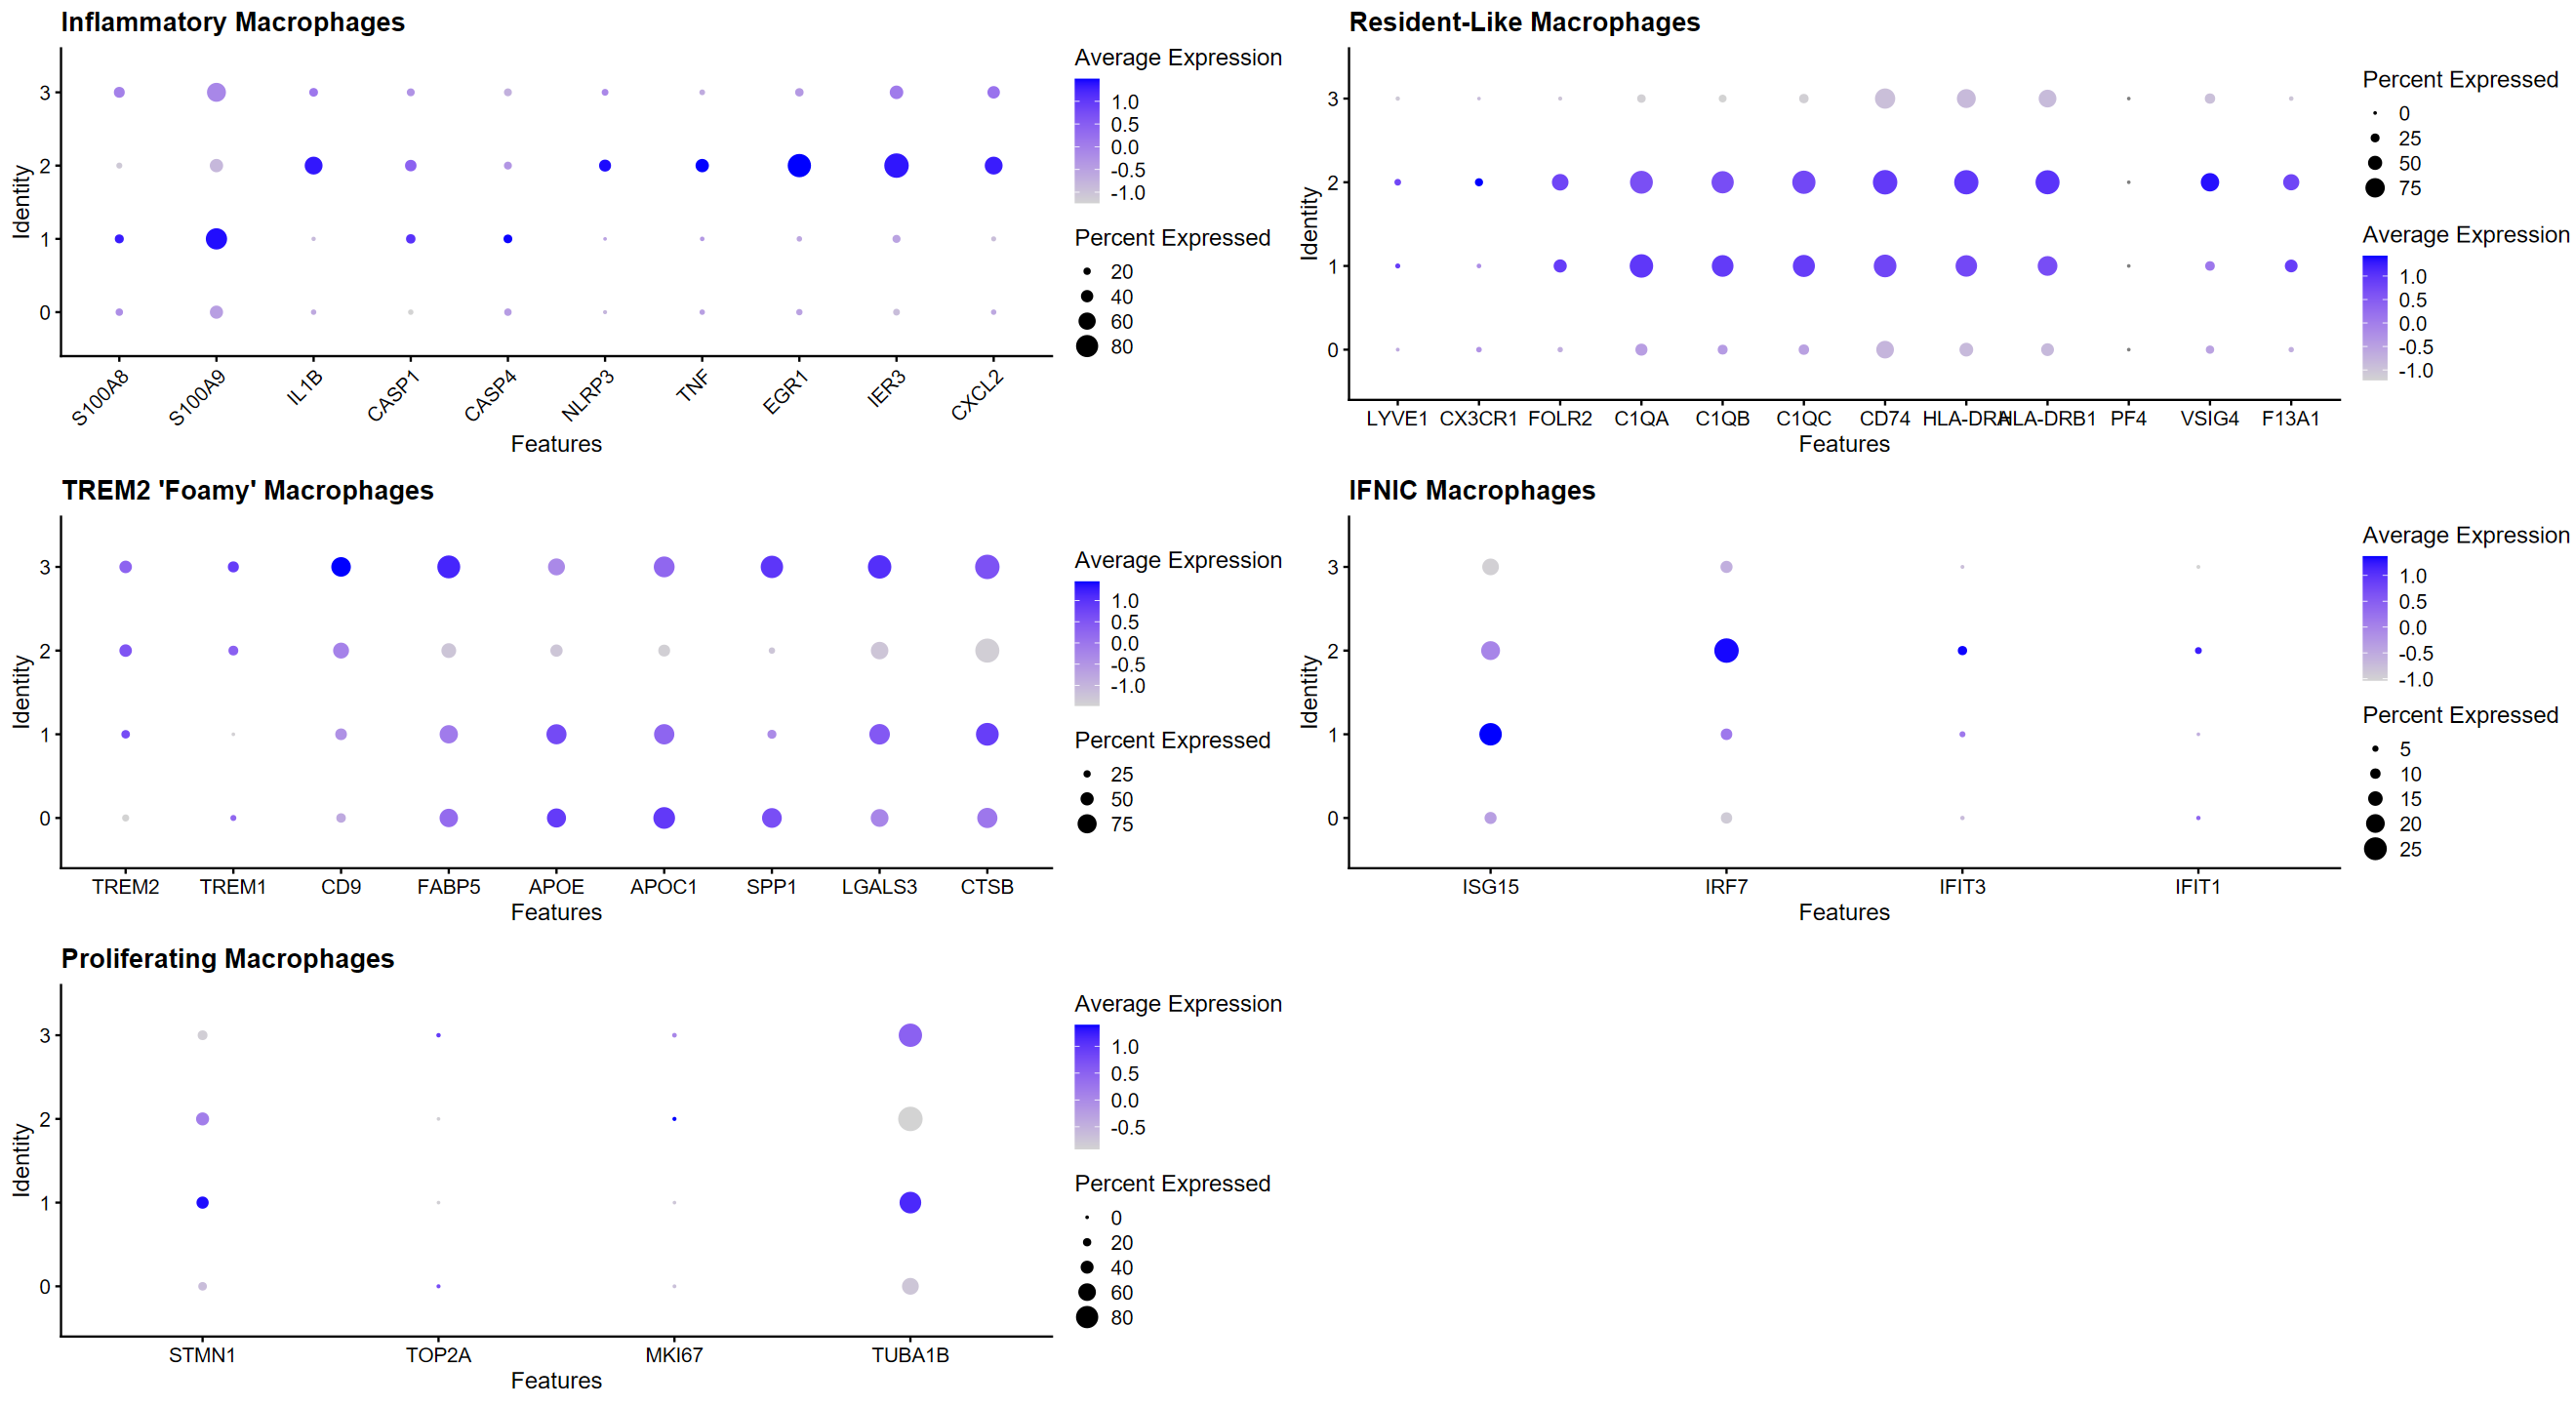

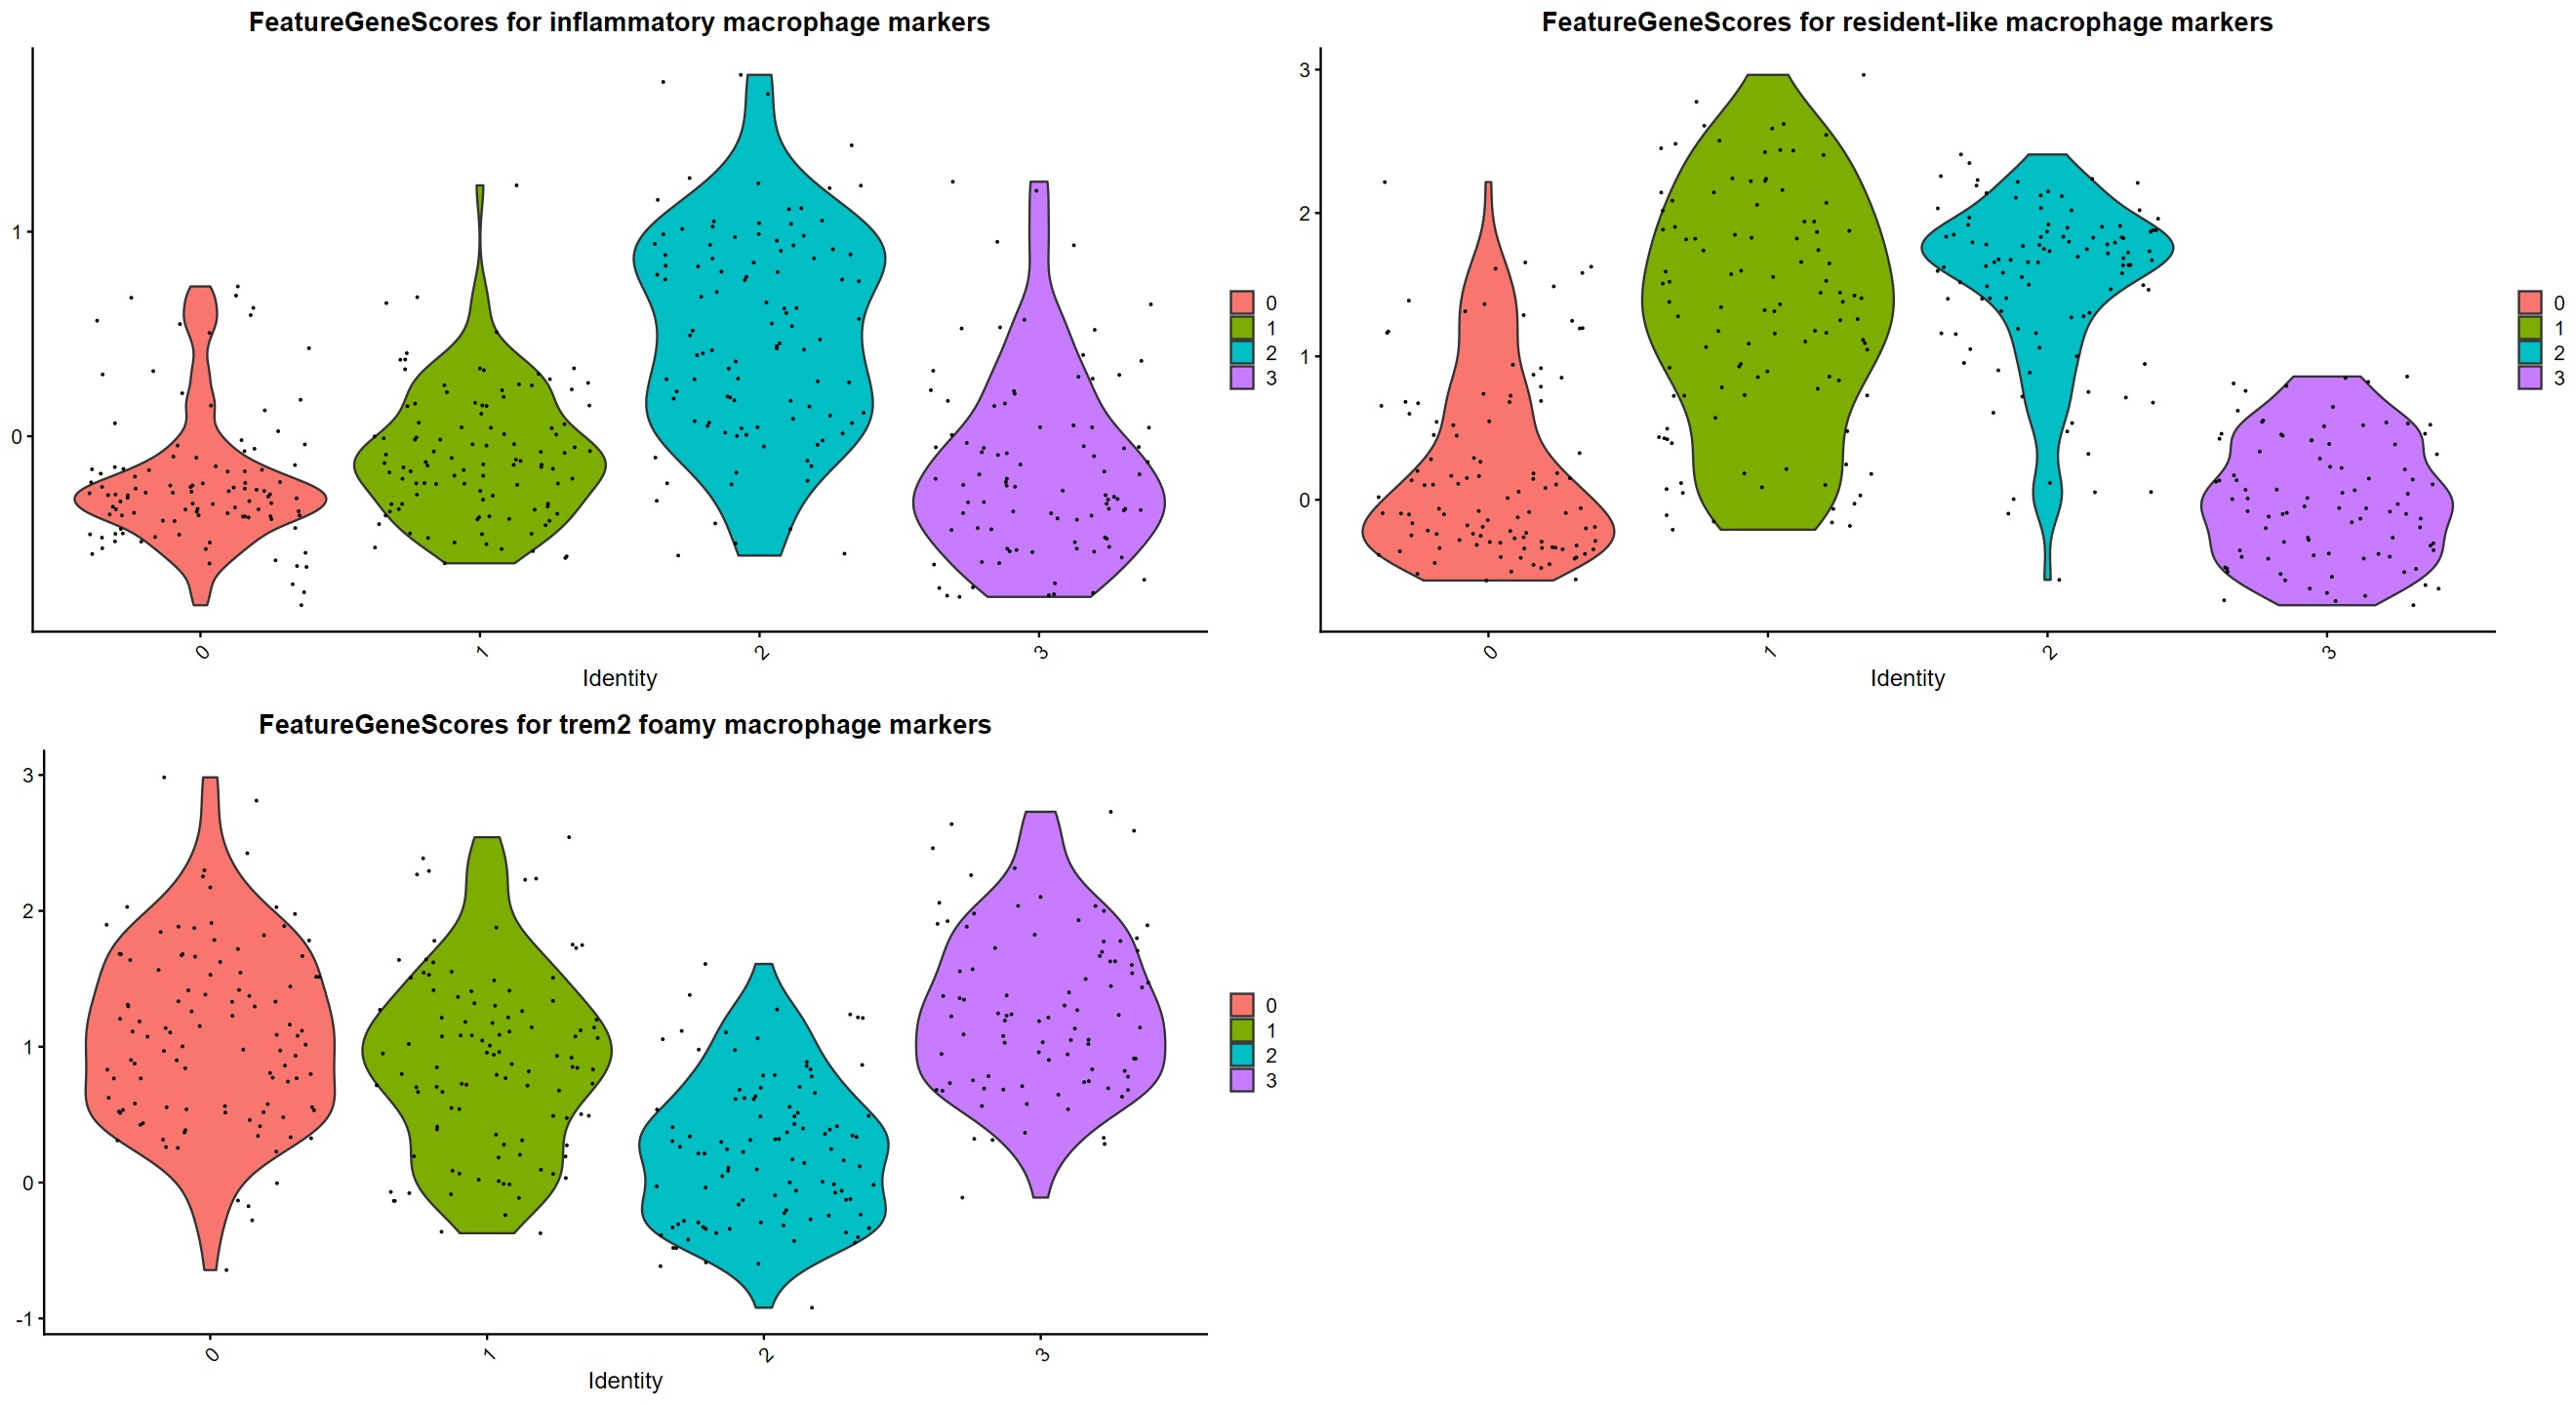

In [10]:
# Plot
grid.arrange(inflammatory_dot, resident_dot, TREM2_dot, IFNIC_dot, proliferating_dot, ncol = 2)
grid.arrange(inflammatory_vln, residents_vln, trem2_vln, ncol=2)


Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Warning message in DoHeatmap(macrophage_data, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: DNAJB4, MSRB2, IL18, IDH1, CRYL1, FUCA1, NTAN1, C9orf16"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


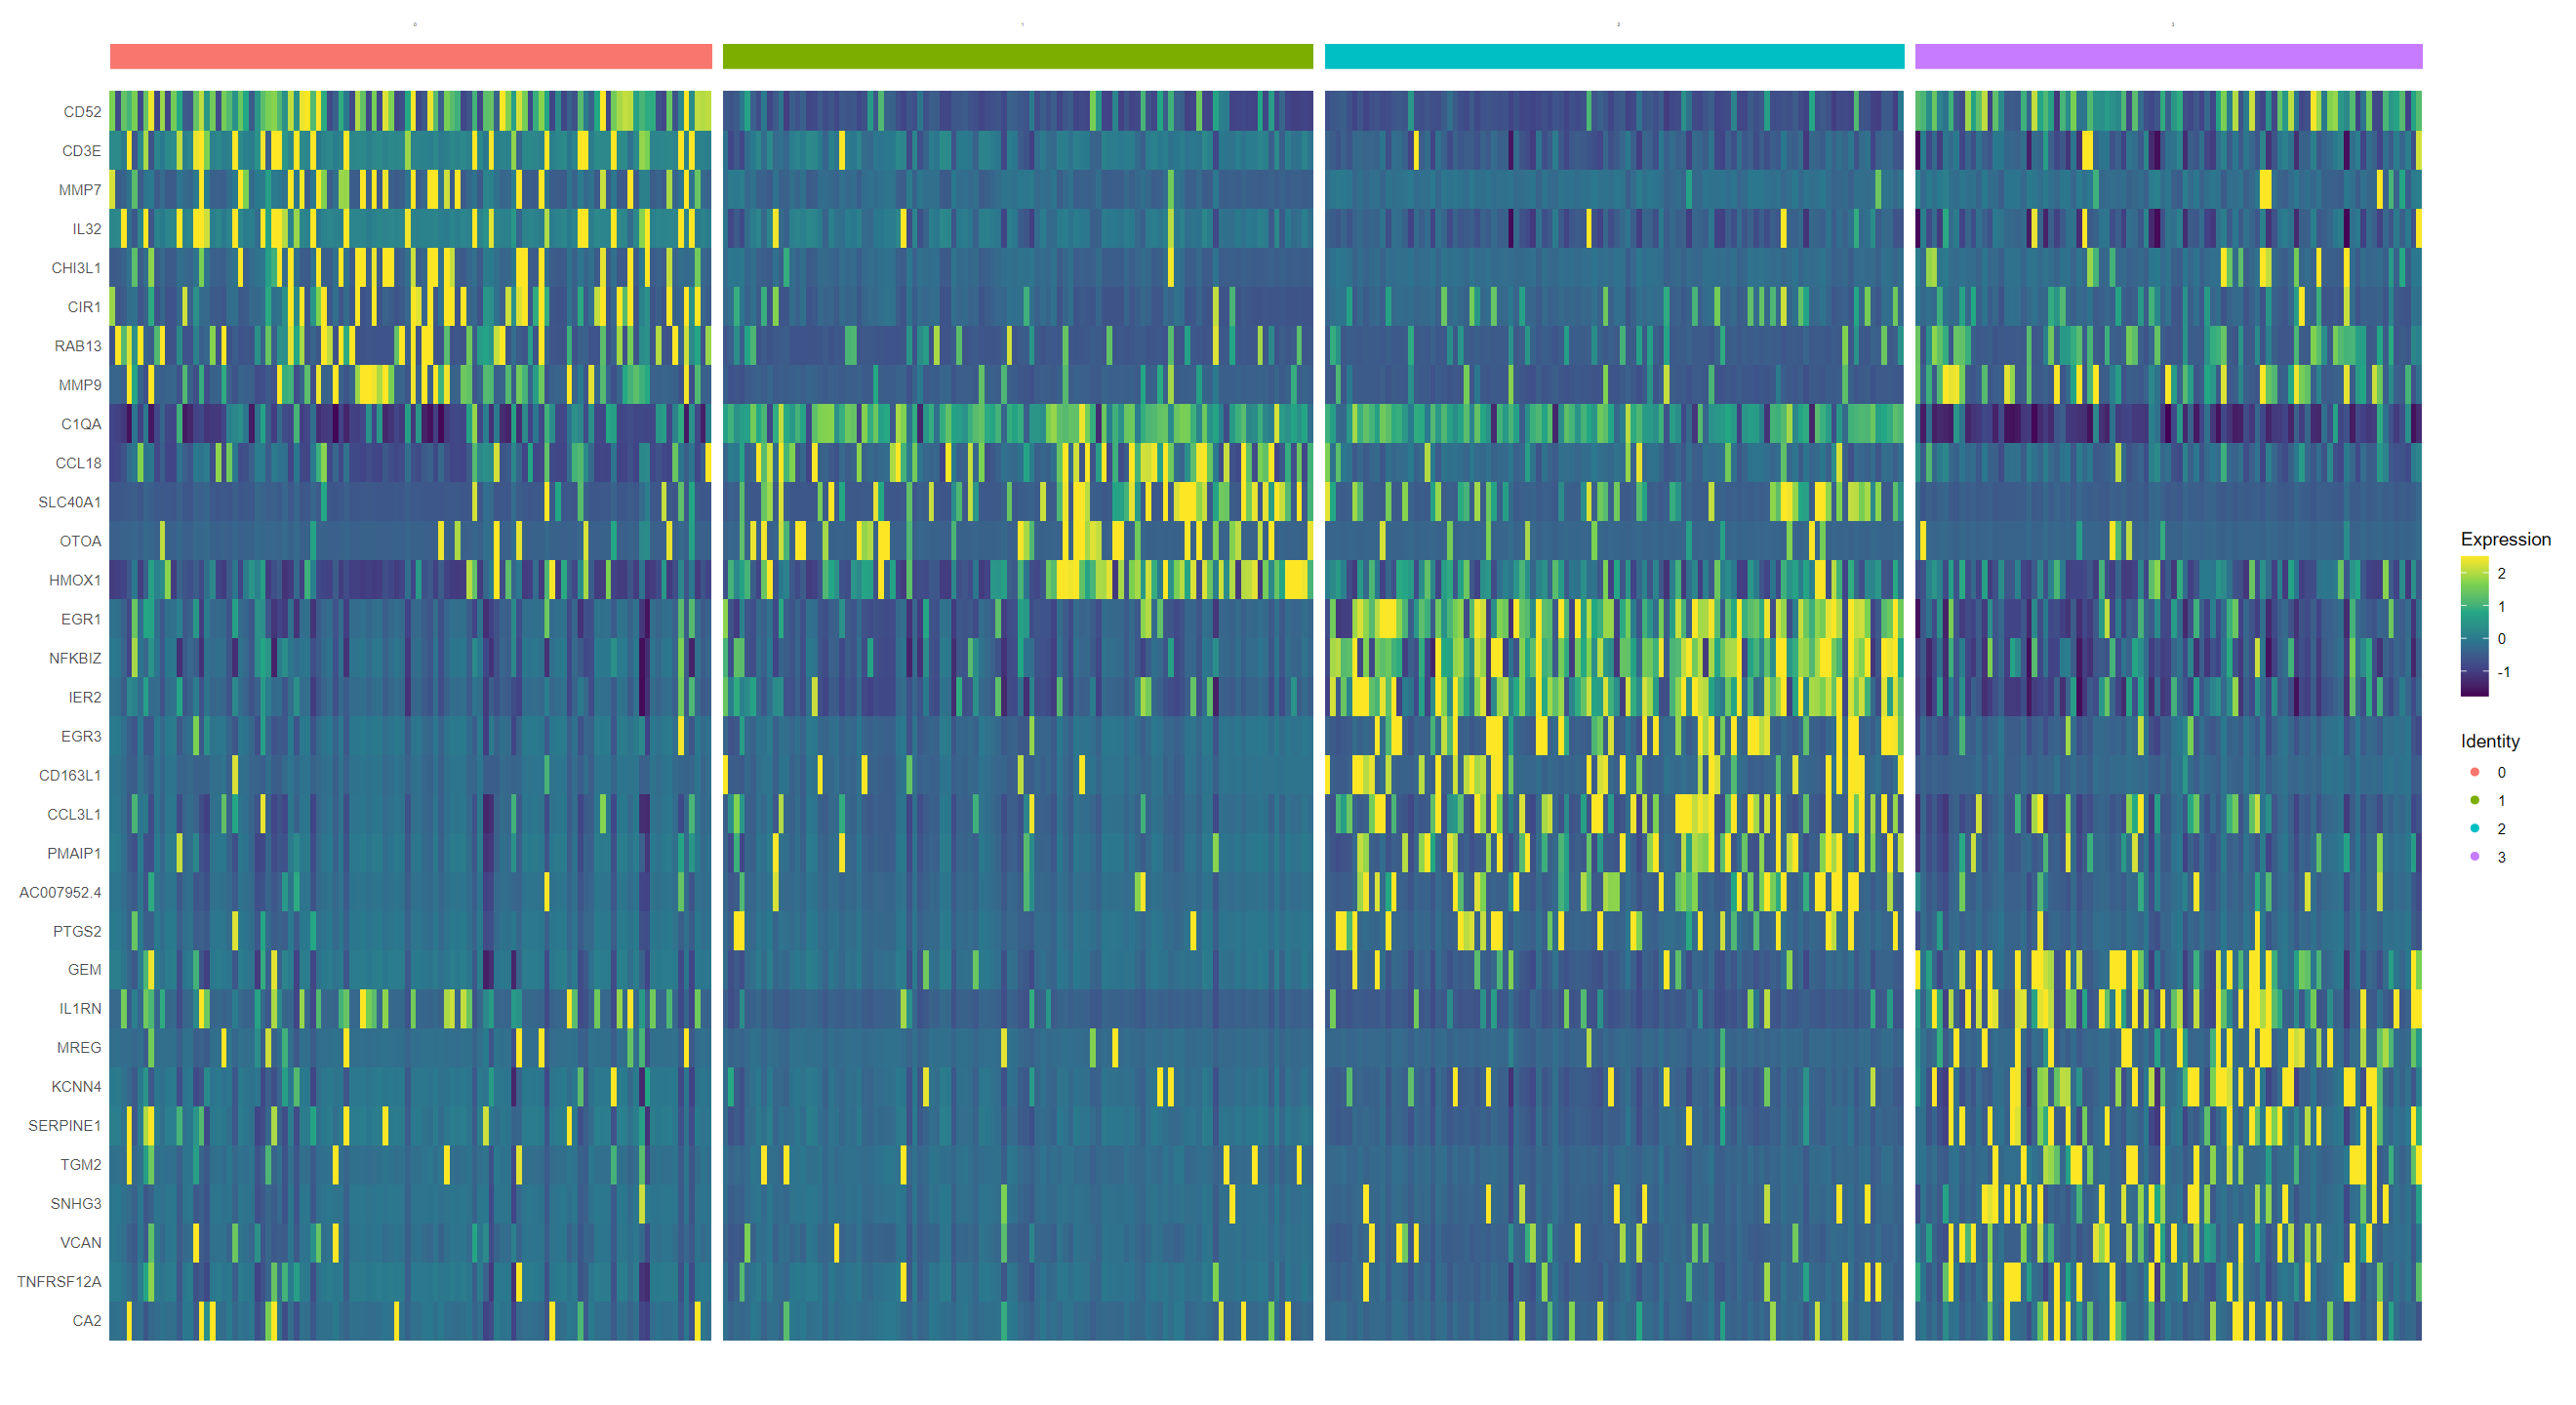

In [11]:
# Interessant
markers <- FindAllMarkers(macrophage_data, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(macrophage_data, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

In [12]:
# Markers
markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05) %>% filter(pct.2 < 0.5) %>% slice_max(order_by = avg_log2FC, n = 5) %>% arrange(cluster, desc(pct.1)) 

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
5.156455e-08,3.679970,0.380,0.150,1.971004e-03,0,CIR1
4.985683e-12,3.561105,0.269,0.040,1.905727e-07,0,IL32
3.627396e-14,4.102989,0.259,0.023,1.386536e-09,0,CD3E
2.649050e-09,3.270904,0.259,0.056,1.012573e-04,0,CHI3L1
2.048458e-12,5.623420,0.250,0.030,7.830027e-08,0,MMP7
1.092280e-09,2.382800,0.472,0.208,4.175131e-05,1,FUCA1
8.867960e-10,2.425514,0.453,0.175,3.389689e-05,1,SLC40A1
4.849945e-15,4.923869,0.434,0.106,1.853843e-10,1,CCL18
9.770671e-08,2.329766,0.368,0.158,3.734741e-03,1,CRYL1


In [13]:
# Assign new labels
macrophage_data <- SetIdent(macrophage_data, value = "seurat_clusters")
macrophage_data <- RenameIdents(macrophage_data,
                                   '0' = 'TREM2 Foamy Macrophages',
                                   '1' = 'Resident-like Macrophages',
                                   '2' = 'Inflammatory Macrophages', 
                                   '3' = 'TREM2 Foamy Macrophages')

# Proportion tables
annotations_per_origin <- table(Idents(macrophage_data), macrophage_data$orig.ident)
annotations_per_origin_prop <- prop.table(table(Idents(macrophage_data), macrophage_data$orig.ident), margin = 2) * 100

# Subtype plots after annotation
subtype_annotated_plot <- DimPlot(macrophage_data, reduction = "umap", label = TRUE)
subtype_origin_plot <- DimPlot(macrophage_data, reduction = "umap", group.by = "orig.ident", label = TRUE)
annotations_total <- prop.table(table(Idents(macrophage_data))) * 100

# Combine tables side by side
combined_df <- cbind(annotations_per_origin, annotations_per_origin_prop, annotations_total)

,"P1, P2, P3, P4 and P8",P5,P6,P7,"P1, P2, P3, P4 and P8",P5,P6,P7,annotations_total
TREM2 Foamy Macrophages,28,80,51,40,43.7500,49.68944,51,47.61905,48.65526
Resident-like Macrophages,27,30,23,26,42.1875,18.63354,23,30.95238,25.91687
Inflammatory Macrophages,9,51,26,18,14.0625,31.67702,26,21.42857,25.42787


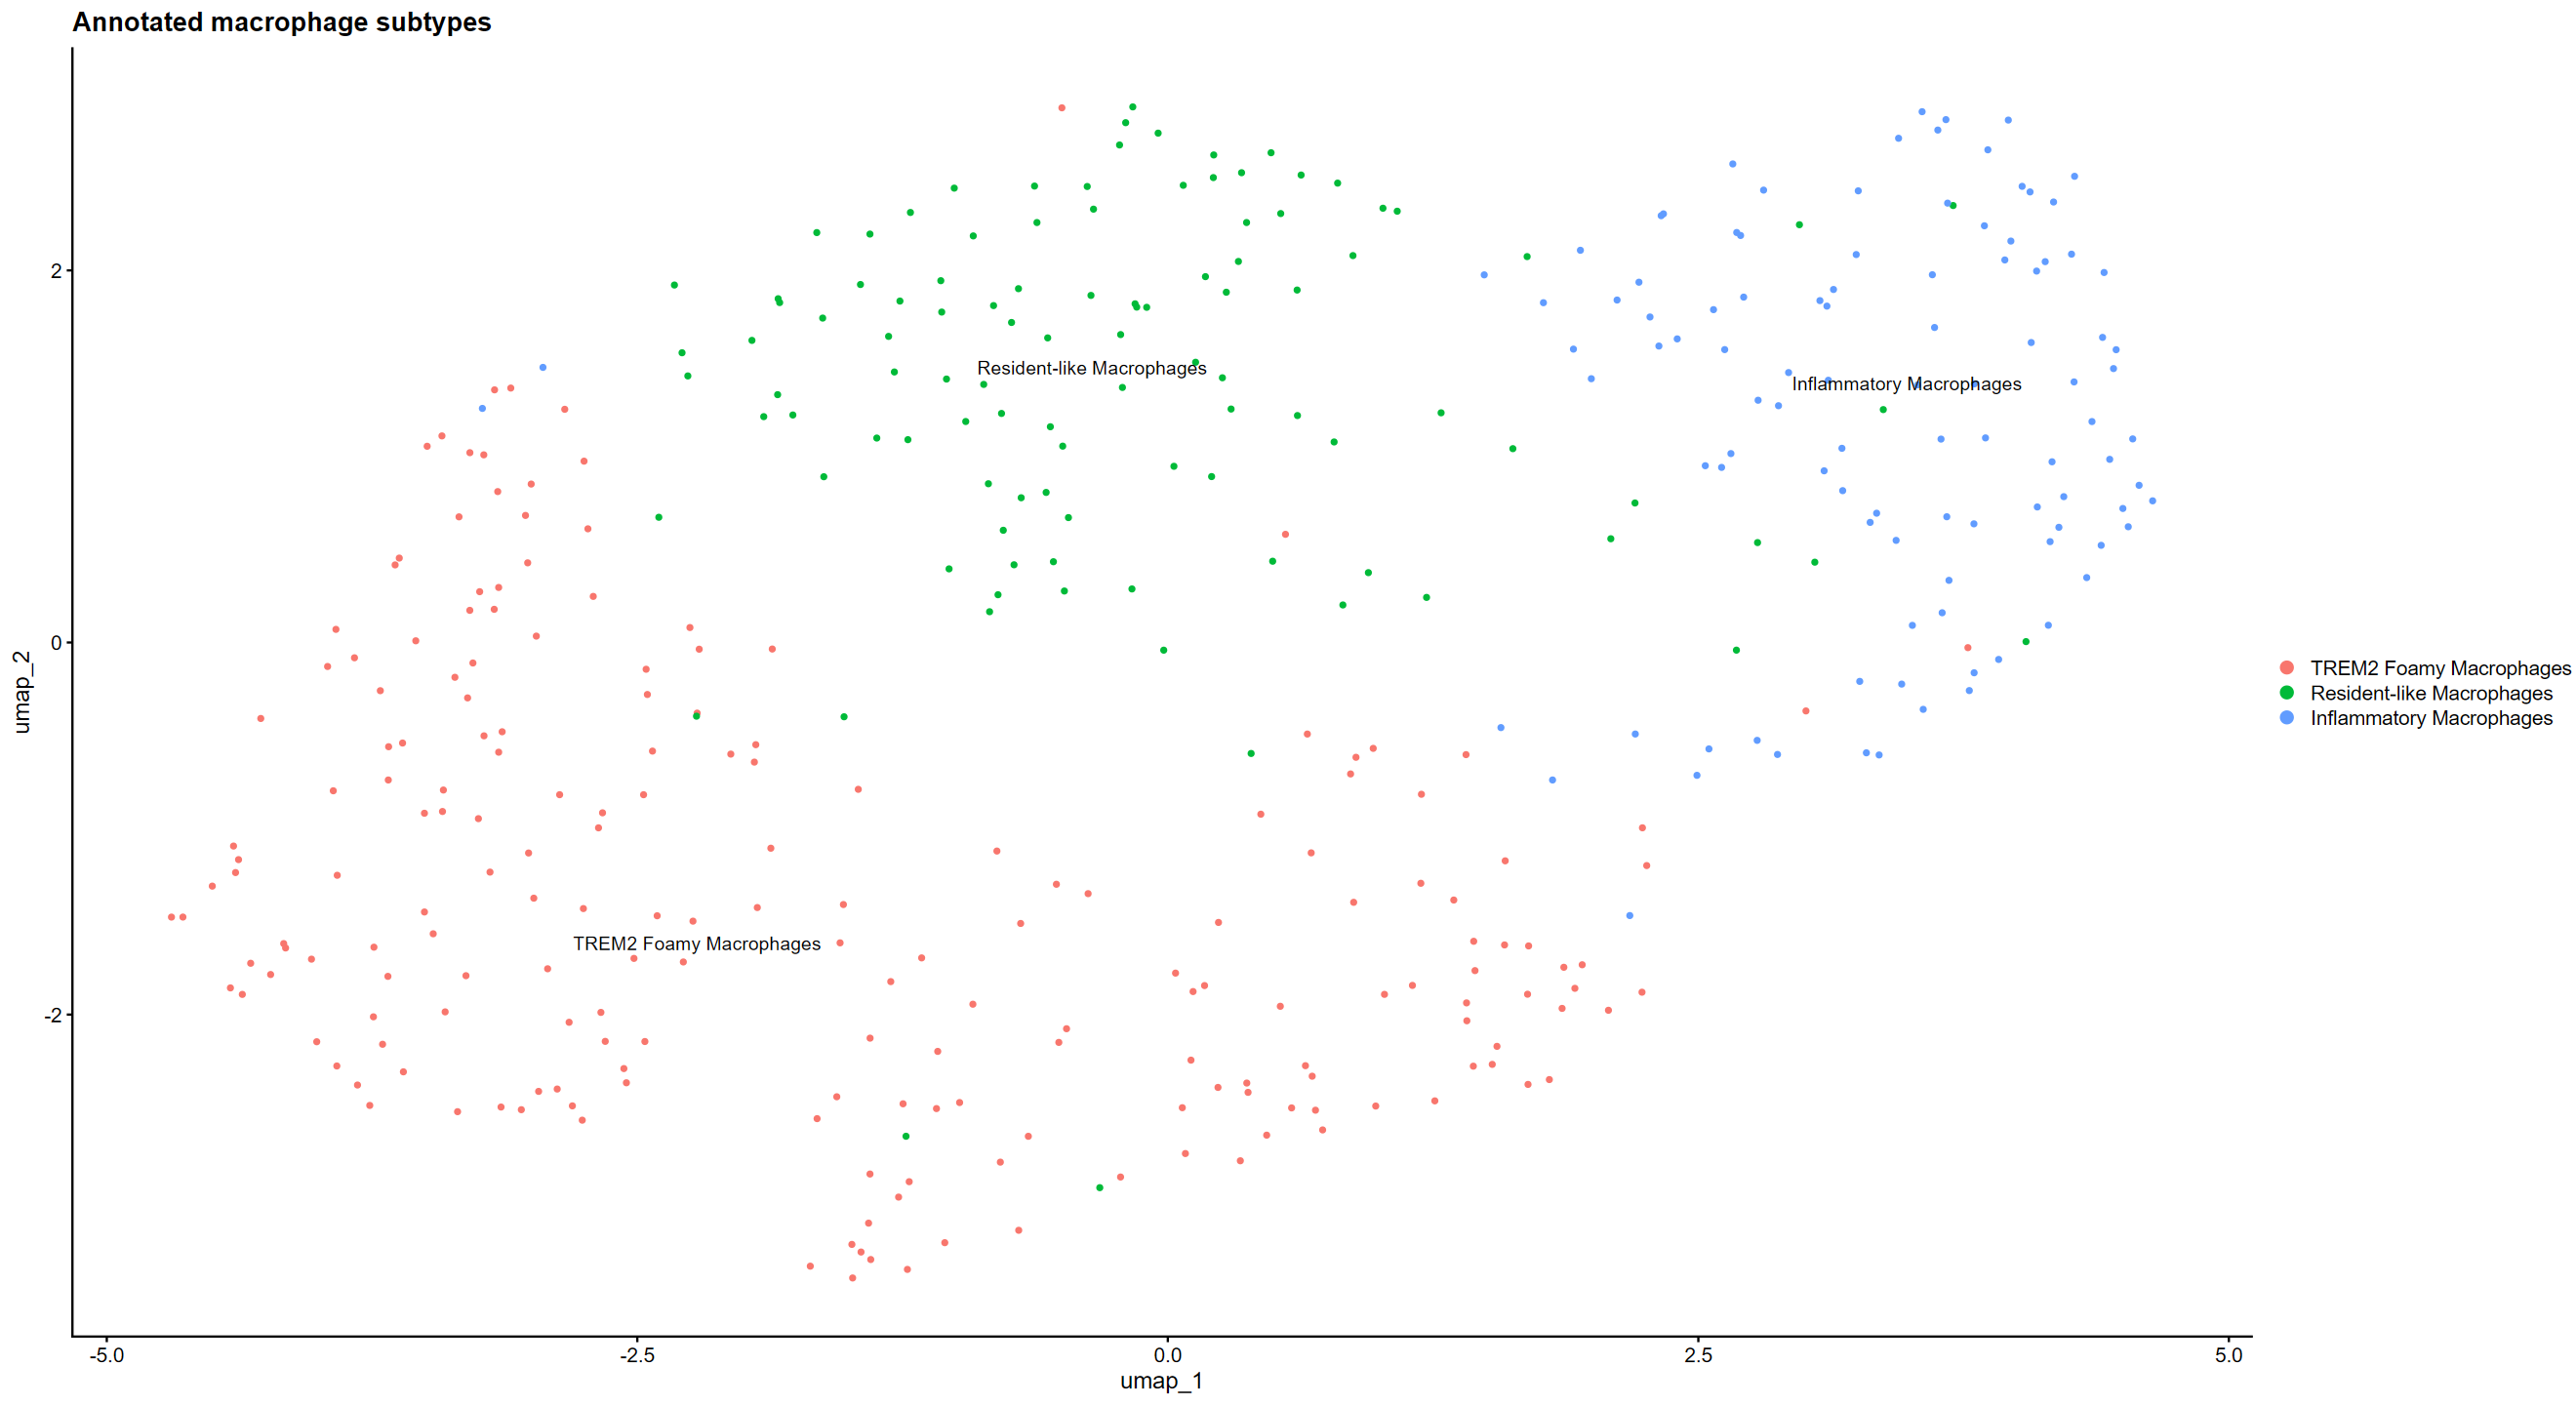

In [14]:
# Plot table
combined_df

# Plotting annotations and titles
grid.arrange(
    subtype_annotated_plot + ggtitle("Annotated macrophage subtypes")
    #subtype_origin_plot + ggtitle("DimPlot by origin"),
    #ncol=1
)